In [176]:
import sys
sys.path.append('../../ecoflux')
import pandas as pd
import iodat as ld
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pdb as pdb

%matplotlib inline

# Soil respiration

## Parse Mojave background data

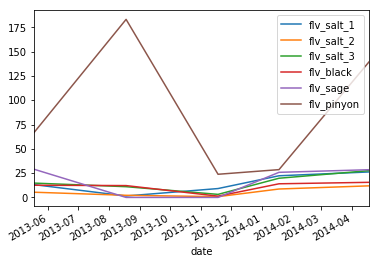

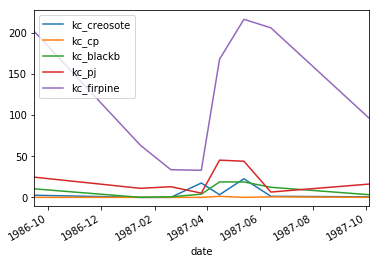

In [177]:
flv_oert = pd.read_csv('/home/greg/data/rawdata/MojaveCarbon/modeling_background/flv_soilCO2flux.csv',
                       skiprows=1,index_col=0, parse_dates=True)
kc_amund = pd.read_csv('/home/greg/data/rawdata/MojaveCarbon/modeling_background/kylecyn_soilCO2flux.csv',
                       skiprows=1,index_col=0, parse_dates=True)
# Convert
flv_oert_c = (flv_oert*1000)/(10000*12)
kc_amund_c = (kc_amund*1000)/(10000*12)
f1 = flv_oert_c.plot()
f2 = kc_amund_c.plot()

## Parse MNP daycent data

In [178]:
path = '/home/greg/current/mojaveCENT/DAYCENT_mnp/'
#mnp_creo = ld.load_century_lis(path + 'mnpcreosote.out/mnpcreosote_Eq_master.lis').loc[5997:5999]
mnp_jtree = ld.load_century_lis(path + 'mnpjtree.out/mnpjtree_Eq_master.lis').loc[5997:5999]
mnp_pj = ld.load_century_lis(path + 'mnppj.out/mnppj_Eq_master.lis').loc[5997:5999]

Parsing /home/greg/current/mojaveCENT/DAYCENT_mnp/mnpjtree.out/mnpjtree_Eq_master.lis
Parsing /home/greg/current/mojaveCENT/DAYCENT_mnp/mnppj.out/mnppj_Eq_master.lis


In [179]:
mnp_pj.head()

,pet,evap,tran,stemp,tave,agdefac,bgdefac,fcacc,rleavc,fbrchc,...,metabc(2),strucc(1),strucc(2),agcacc,bgcjacc,bgcjprd,tnetmn(1),tminrl(1),somte(1),resp(1)
Date,,,,,,,,,,,,,,,,,,,,,
5997.00,3.1469,0.9800,0.0145,0.7850,5.0750,0.0186,0.1076,0.0000,94.2521,338.9945,...,19.2378,2720.2627,218.1249,0.0,0.0,0.0,9.4666,0.4690,309.9537,391.1839
5997.08,3.2642,1.0182,0.0156,-1.2118,3.0133,0.0091,0.0769,0.0000,91.4652,325.6938,...,23.8913,2720.9231,220.4455,0.0,0.0,0.0,0.2594,0.5145,310.2385,9.9703
5997.17,4.3940,0.8213,0.0215,1.8047,6.2567,0.0051,0.0784,0.0000,88.7606,312.9143,...,27.2013,2722.1633,222.3897,0.0,0.0,0.0,0.5493,0.6280,310.4135,18.3334
5997.25,7.9160,0.9793,0.0391,5.5021,10.9400,0.0067,0.1019,20.6972,104.2564,300.6371,...,28.8105,2723.2834,223.6520,0.0,0.0,0.0,0.9393,0.7823,310.5346,29.4845
5997.33,9.9627,0.8765,0.0498,7.0826,12.3200,0.0074,0.1131,68.7262,142.6594,288.8412,...,28.9214,2724.9246,225.2185,0.0,0.0,0.0,1.4136,0.1878,310.4187,41.9601


In [180]:
# Reindex century data with datetime objects
newix = pd.date_range('1985-12-31', '1987-12-31', freq='M')
print(newix)

#mnp_creo.index = cent_idx
mnp_jtree.index = newix
mnp_pj.index = newix

DatetimeIndex(['1985-12-31', '1986-01-31', '1986-02-28', '1986-03-31',
               '1986-04-30', '1986-05-31', '1986-06-30', '1986-07-31',
               '1986-08-31', '1986-09-30', '1986-10-31', '1986-11-30',
               '1986-12-31', '1987-01-31', '1987-02-28', '1987-03-31',
               '1987-04-30', '1987-05-31', '1987-06-30', '1987-07-31',
               '1987-08-31', '1987-09-30', '1987-10-31', '1987-11-30',
               '1987-12-31'],
              dtype='datetime64[ns]', freq='M')


In [181]:
# Function to convert the Century accumulator to monthly values
def accum_to_monthly(df, varstr):
    jan = df.loc[df.index.month==1, varstr]
    df2 = df[varstr].diff()
    df2[df.index.month==1] = jan
    return df2

In [182]:
# Get monthly soil resp values from the accumulator
#creo_kc_mon = accum_to_monthly(mnp_creo, 'resp(1)')
jtree_kc_mon = accum_to_monthly(mnp_jtree, 'resp(1)')
pj_kc_mon = accum_to_monthly(mnp_pj, 'resp(1)')
jtree_kc_mon.head()

1985-12-31        NaN
1986-01-31    16.8426
1986-02-28    20.8375
1986-03-31    28.0172
1986-04-30    32.9256
Freq: M, Name: resp(1), dtype: float64

## Pars Century data for Fish Lake Valley

In [183]:
path = '/home/greg/current/mojaveCENT/DAYCENT_flv/'
flv_salt = ld.load_century_lis(path + 'flvsaltbush.out/flvsaltbush_Eq_master.lis').loc[5997:5999.92]
flv_black = ld.load_century_lis(path + 'flvblackbrush.out/flvblackbrush_Eq_master.lis').loc[5997:5999.92]
flv_sage = ld.load_century_lis(path + 'flvsagebrush.out/flvsagebrush_Eq_master.lis').loc[5997:5999.92]
flv_pinyon = ld.load_century_lis(path + 'flvpinyon.out/flvpinyon_Eq_master.lis').loc[5997:5999.92]
flv_pinyon.tail()

Parsing /home/greg/current/mojaveCENT/DAYCENT_flv/flvsaltbush.out/flvsaltbush_Eq_master.lis
Parsing /home/greg/current/mojaveCENT/DAYCENT_flv/flvblackbrush.out/flvblackbrush_Eq_master.lis
Parsing /home/greg/current/mojaveCENT/DAYCENT_flv/flvsagebrush.out/flvsagebrush_Eq_master.lis
Parsing /home/greg/current/mojaveCENT/DAYCENT_flv/flvpinyon.out/flvpinyon_Eq_master.lis


,pet,evap,tran,stemp,tave,agdefac,bgdefac,fcacc,rleavc,fbrchc,...,metabc(2),strucc(1),strucc(2),agcacc,bgcjacc,bgcjprd,tnetmn(1),tminrl(1),somte(1),resp(1)
Date,,,,,,,,,,,,,,,,,,,,,
5999.58,14.2915,1.0932,0.0714,10.4616,17.1400,0.0089,0.1357,26.4714,27.6168,8.8112,...,1.0083,406.7794,14.0659,0.0,0.0,0.0,0.2033,0.1163,37.9500,9.2877
5999.67,11.8080,0.9782,0.0590,8.2062,14.6767,0.0087,0.1338,30.9592,30.7117,8.4655,...,0.9274,406.9257,14.0478,0.0,0.0,0.0,0.2499,0.1144,37.9242,10.4417
5999.75,9.1499,0.8365,0.0457,7.5209,14.1367,0.0084,0.1289,34.9615,33.3255,8.1333,...,0.8687,407.1227,14.0331,0.0,0.0,0.0,0.2938,0.1143,37.9007,11.5459
5999.83,4.6416,1.3968,0.0196,-1.4846,4.4633,0.0130,0.0744,35.5652,27.1622,7.8142,...,0.9215,410.1960,14.0531,0.0,0.0,0.0,0.3213,0.1090,37.9024,12.6517
5999.92,3.0184,1.0923,0.0141,-2.6477,2.5617,0.0103,0.0929,35.5652,17.2402,7.5076,...,0.9667,414.9592,14.0729,0.0,0.0,0.0,0.3539,0.1603,37.8981,13.7188


In [184]:
# Reindex century data with datetime objects
newix = pd.date_range('2012-12-31', '2015-11-30', freq='M')
print(newix)

flv_salt.index = newix
flv_black.index = newix
flv_sage.index = newix
flv_pinyon.index = newix

DatetimeIndex(['2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31',
               '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31',
               '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30',
               '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31',
               '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31',
               '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30',
               '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31',
               '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31',
               '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30'],
              dtype='datetime64[ns]', freq='M')


In [185]:
# Get monthly soil resp values from the accumulator
salt_flv_mon = accum_to_monthly(flv_salt, 'resp(1)')
black_flv_mon = accum_to_monthly(flv_black, 'resp(1)')
sage_flv_mon = accum_to_monthly(flv_sage, 'resp(1)')
pinyon_flv_mon = accum_to_monthly(flv_pinyon, 'resp(1)')
salt_flv_mon.head()

2012-12-31         NaN
2013-01-31     36.6745
2013-02-28     71.1091
2013-03-31    157.7141
2013-04-30     51.9424
Freq: M, Name: resp(1), dtype: float64

## CO2 flux plots

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

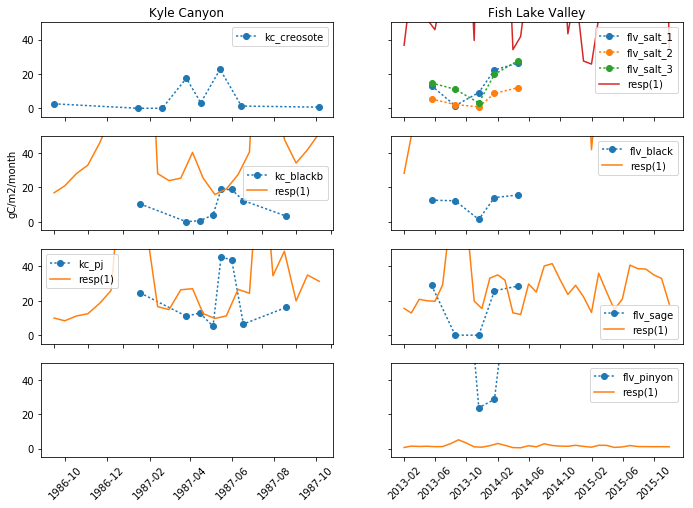

In [186]:
fig1, ax = plt.subplots(4, 2, figsize=(11.5, 8), sharey=True)
ax[0,0].plot(kc_amund_c.index, kc_amund_c.kc_creosote, marker='o',ls=':')
#ax[0,0].plot(creo_kc_mon)
ax[0,0].legend()
ax[0,0].set_xticklabels([])
ax[0,0].set_title('Kyle Canyon')

ax[1,0].plot(kc_amund_c.index, kc_amund_c.kc_blackb, marker='o',ls=':')
ax[1,0].plot(jtree_kc_mon)
ax[1,0].legend()
ax[1,0].set_xticklabels([])
ax[1,0].set_ylabel('gC/m2/month')

ax[2,0].plot(kc_amund_c.index, kc_amund_c.kc_pj, marker='o',ls=':')
ax[2,0].plot(pj_kc_mon)
ax[2,0].legend()
ax[2,0].set_xticklabels([])

ax[3,0].plot(kc_amund_c.index, kc_amund_c.kc_pj, marker=None,color='white')
plt.setp(ax[3,0].xaxis.get_majorticklabels(), rotation=45)

ax[0,1].plot(flv_oert_c.index, flv_oert_c.flv_salt_1, marker='o',ls=':')
ax[0,1].plot(flv_oert_c.index, flv_oert_c.flv_salt_2, marker='o',ls=':')
ax[0,1].plot(flv_oert_c.index, flv_oert_c.flv_salt_3, marker='o',ls=':')
ax[0,1].plot(salt_flv_mon)
ax[0,1].legend()
ax[0,1].set_xticklabels([])
ax[0,1].set_title('Fish Lake Valley')

ax[1,1].plot(flv_oert_c.index, flv_oert_c.flv_black, marker='o',ls=':')
ax[1,1].plot(black_flv_mon)
ax[1,1].legend()
ax[1,1].set_xticklabels([])

ax[2,1].plot(flv_oert_c.index, flv_oert_c.flv_sage, marker='o',ls=':')
ax[2,1].plot(sage_flv_mon)
ax[2,1].legend()
ax[2,1].set_xticklabels([])

ax[3,1].plot(flv_oert_c.index, flv_oert_c.flv_pinyon, marker='o',ls=':')
ax[3,1].plot(pinyon_flv_mon)
ax[3,1].set_ylim([-5,50])
ax[3,1].legend()
plt.setp(ax[3,1].xaxis.get_majorticklabels(), rotation=45)



# Soil C

## Parse soil survey data

In [187]:
mojaveSoilC = pd.read_csv('/home/greg/data/rawdata/MojaveCarbon/modeling_background/mojave_soilC.csv')
mojaveSoilC.head()

,user_site_id,pedon_key,lat,long,elevation,precip,temp,Total C (kg)
0,73NV003001,73C0105,35.560833,115.143056,1606.0,227.020803,13.430305,4.250039
1,73NV003002,73C0106,35.565556,115.089444,1358.9,203.577854,15.136022,5.961594
2,73NV003003,73C0107,35.791667,115.334167,895.8,152.976003,18.095441,2.312065
3,73NV003004,73C0108,35.810556,115.615278,809.1,142.122560,18.496982,2.652008
4,73NV003006,73C0110,35.991389,115.263889,808.7,141.455012,18.719576,1.985300


## Get Century C data and climate

In [188]:
flv_salt.somtc.max()

16698.5488

In [189]:
df = pd.read_csv('/home/greg/data/gdrive_berkeley/MojaveCarbon/Data/mojave_field_sites.csv')

df['totC_dc'] = np.nan
df['N2Oflux_dc'] = np.nan
df['CH4flux_dc'] = np.nan
df.totC_dc.loc[[0, 1, 2, 3, 9, 10]] = [flv_salt.somtc.max(),flv_black.somtc.max(),
                                        flv_sage.somtc.max(),flv_pinyon.somtc.max(),
                                        mnp_jtree.somtc.max(),mnp_pj.somtc.max()]
df

/home/greg/data/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,siteid_1,siteid_2,desc,lat,lon,elev,WCmat,WCmap,PRISMmat,PRISMmap,PRISMmap_interp,MRmodelMAT,MRmodelMAP,VegCovPct,totC_dc,N2Oflux_dc,CH4flux_dc
0,FLV_A_avg,flvsaltbush,Saltbush,37.838800,-118.075750,1482.0,11.233333,131.0,12.28,125.90,NaN,10.629697,223.786466,NaN,16698.5488,NaN,NaN
1,FLV_B,flvblackbrush,Blackbrush,37.881231,-118.180439,1745.0,9.441667,157.0,10.43,169.56,NaN,9.055545,244.414392,NaN,23512.0801,NaN,NaN
2,FLV_C,flvsagebrush,Sagebrush,37.855369,-118.230139,2140.0,7.033333,201.0,7.48,228.10,NaN,6.796285,276.343843,NaN,5844.0327,NaN,NaN
3,FLV_D,flvpinyon,Pinyon,37.871289,-118.296381,2602.0,3.783333,296.0,5.04,319.64,NaN,4.112416,313.254994,NaN,449.5455,NaN,NaN
4,KC_C,kccreosote,Creosote,36.329600,-115.295513,840.0,17.383333,115.0,18.70,117.28,NaN,16.343904,189.277181,NaN,NaN,NaN,NaN
5,KC_B,kcblackbrush,Blackbrush,36.278889,-115.454877,1400.0,13.875000,199.0,15.05,247.32,NaN,13.128968,234.570995,NaN,NaN,NaN,NaN
6,KC_P,kcpj,PinyonJuniper,36.269495,-115.532620,1750.0,11.583333,262.0,12.87,330.23,NaN,11.106559,262.699632,NaN,NaN,NaN,NaN
7,KC_F,kcfir,Fir,36.262794,-115.618376,2150.0,9.366667,335.0,9.29,553.82,NaN,8.792638,294.813082,NaN,NaN,NaN,NaN
8,MNP_Creosote,mnpcreosote,Creosote,35.106130,-115.550740,935.4,NaN,NaN,18.00,178.32,178.46,16.766840,207.908774,31.7,NaN,NaN,NaN
9,MNP_JTree,mnpjtree,Joshua Tree,35.169120,-115.480106,1252.7,NaN,NaN,16.05,153.44,155.37,14.910525,232.914112,46.2,5702.7197,NaN,NaN


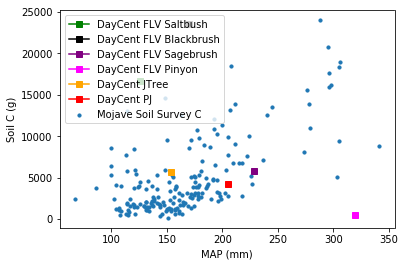

In [190]:
fig2, ax = plt.subplots()
ax.scatter(mojaveSoilC.precip, mojaveSoilC['Total C (kg)']*1000, label='Mojave Soil Survey C', s=10)
ax.plot(df.PRISMmap.iloc[0], df.totC_dc.iloc[0], marker='s', color='green',label='DayCent FLV Saltbush')
ax.plot(df.PRISMmap.iloc[1], df.totC_dc.iloc[1], marker='s', color='black',label='DayCent FLV Blackbrush')
ax.plot(df.PRISMmap.iloc[2], df.totC_dc.iloc[2], marker='s', color='purple',label='DayCent FLV Sagebrush')
ax.plot(df.PRISMmap.iloc[3], df.totC_dc.iloc[3], marker='s', color='magenta',label='DayCent FLV Pinyon')
#ax.plot(df.PRISMmap.iloc[8], df.totC_dc.iloc[4], marker='s', color='y',label='DayCent Creosote')
ax.plot(df.PRISMmap.iloc[9], df.totC_dc.iloc[9], marker='s', color='orange',label='DayCent JTree')
ax.plot(df.PRISMmap.iloc[10], df.totC_dc.iloc[10], marker='s', color='red',label='DayCent PJ')
#ax.plot(df.MAP, df.CentTotC, marker='o', color='y',label='Creosote')
ax.set_ylabel('Soil C (g)')
ax.set_xlabel('MAP (mm)')
plt.legend()

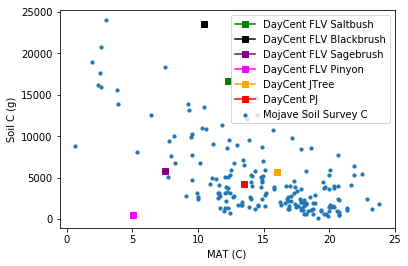

In [191]:
fig3, ax = plt.subplots()
ax.scatter(mojaveSoilC.temp, mojaveSoilC['Total C (kg)']*1000, label='Mojave Soil Survey C',s=10)
ax.plot(df.PRISMmat.iloc[0], df.totC_dc.iloc[0], marker='s', color='green',label='DayCent FLV Saltbush')
ax.plot(df.PRISMmat.iloc[1], df.totC_dc.iloc[1], marker='s', color='black',label='DayCent FLV Blackbrush')
ax.plot(df.PRISMmat.iloc[2], df.totC_dc.iloc[2], marker='s', color='purple',label='DayCent FLV Sagebrush')
ax.plot(df.PRISMmat.iloc[3], df.totC_dc.iloc[3], marker='s', color='magenta',label='DayCent FLV Pinyon')
#ax.plot(df.PRISMmap.iloc[8], df.totC_dc.iloc[4], marker='s', color='y',label='DayCent Creosote')
ax.plot(df.PRISMmat.iloc[9], df.totC_dc.iloc[9], marker='s', color='orange',label='DayCent JTree')
ax.plot(df.PRISMmat.iloc[10], df.totC_dc.iloc[10], marker='s', color='red',label='DayCent PJ')
ax.set_ylabel('Soil C (g)')
ax.set_xlabel('MAT (C)')
plt.legend()

## Trace gasses

In [192]:
path = '/home/greg/current/mojaveCENT/DAYCENT_flv/'
flv_salt_ann = pd.read_fwf(path + 'flvsaltbush.out/year_summary_master.out')
flv_black_ann = pd.read_fwf(path + 'flvblackbrush.out/year_summary_master.out')
flv_sage_ann = pd.read_fwf(path + 'flvsagebrush.out/year_summary_master.out')
flv_pinyon_ann = pd.read_fwf(path + 'flvpinyon.out/year_summary_master.out')

In [193]:
df.index = df.siteid_2
df.loc['flvsaltbush', 'N2Oflux'] = flv_salt_ann.N2Oflux.max() * 10000
df.loc['flvblackbrush', 'N2Oflux'] = flv_black_ann.N2Oflux.max() * 10000
df.loc['flvsagebrush', 'N2Oflux'] = flv_sage_ann.N2Oflux.max() * 10000
df.loc['flvpinyon', 'N2Oflux'] = flv_pinyon_ann.N2Oflux.max() * 10000

df.loc['flvsaltbush', 'CH4flux'] = flv_salt_ann.N2Oflux.max() * 10000
df.loc['flvblackbrush', 'CH4flux'] = flv_black_ann.N2Oflux.max() * 10000
df.loc['flvsagebrush', 'CH4flux'] = flv_sage_ann.N2Oflux.max() * 10000
df.loc['flvpinyon', 'CH4flux'] = flv_pinyon_ann.N2Oflux.max() * 10000

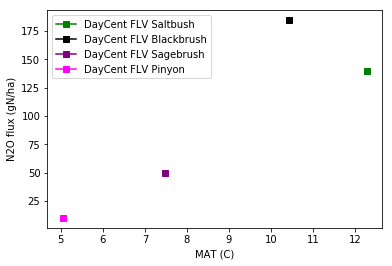

In [194]:
fig4, ax = plt.subplots()
#ax.scatter(mojaveSoilC.temp, mojaveSoilC['Total C (kg)']*1000, label='Mojave Soil Survey C',s=10)
ax.plot(df.PRISMmat.iloc[0], df.N2Oflux.iloc[0], marker='s', color='green',label='DayCent FLV Saltbush')
ax.plot(df.PRISMmat.iloc[1], df.N2Oflux.iloc[1], marker='s', color='black',label='DayCent FLV Blackbrush')
ax.plot(df.PRISMmat.iloc[2], df.N2Oflux.iloc[2], marker='s', color='purple',label='DayCent FLV Sagebrush')
ax.plot(df.PRISMmat.iloc[3], df.N2Oflux.iloc[3], marker='s', color='magenta',label='DayCent FLV Pinyon')
ax.set_ylabel('N2O flux (gN/ha)')
ax.set_xlabel('MAT (C)')
plt.legend()

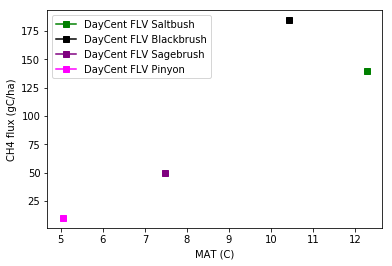

In [195]:
fig5, ax = plt.subplots()
#ax.scatter(mojaveSoilC.temp, mojaveSoilC['Total C (kg)']*1000, label='Mojave Soil Survey C',s=10)
ax.plot(df.PRISMmat.iloc[0], df.CH4flux.iloc[0], marker='s', color='green',label='DayCent FLV Saltbush')
ax.plot(df.PRISMmat.iloc[1], df.CH4flux.iloc[1], marker='s', color='black',label='DayCent FLV Blackbrush')
ax.plot(df.PRISMmat.iloc[2], df.CH4flux.iloc[2], marker='s', color='purple',label='DayCent FLV Sagebrush')
ax.plot(df.PRISMmat.iloc[3], df.CH4flux.iloc[3], marker='s', color='magenta',label='DayCent FLV Pinyon')
ax.set_ylabel('CH4 flux (gC/ha)')
ax.set_xlabel('MAT (C)')
plt.legend()